# Sobel, Canny and Prewitt Edge Detection

In [3]:
import cv2
import numpy as np

# Read the original image
img = cv2.imread('tiger.jpg')

# Convert to graycsale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

# Canny Edge Detection
# edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
img_canny = cv2.Canny(img,100,200)

# Sobel Edge Detection
# sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
# sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
# sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely


# Prewitt Edge Detection
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx) # Prewitt Edge Detection on X axis
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely) # Prewitt Edge Detection on Y axis

# Display Images
cv2.imshow("Original Image", img)
k = cv2.waitKey(0)

cv2.imshow("Canny Edge Detection", img_canny)
k = cv2.waitKey(0)

cv2.imshow("Sobel X Edge Detection", img_sobelx)
k = cv2.waitKey(0)

cv2.imshow("Sobel Y Edge Detection", img_sobely)
k = cv2.waitKey(0)

cv2.imshow("Sobel Edge Detection", img_sobel)
k = cv2.waitKey(0)

cv2.imshow("Prewitt X Edge Detection", img_prewittx)
k = cv2.waitKey(0)

cv2.imshow("Prewitt Y Edge Detection", img_prewitty)
k = cv2.waitKey(0)

cv2.imshow("Prewitt Edge Detection", img_prewittx + img_prewitty)
k = cv2.waitKey(0)
cv2.destroyAllWindows()


# Sobel Operator

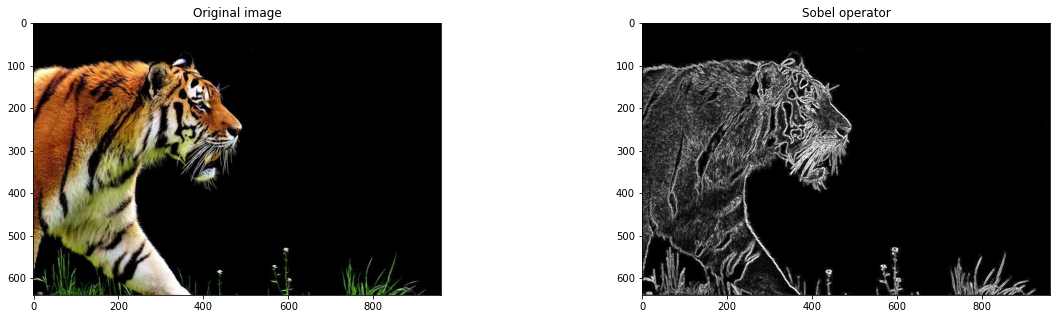

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

# fetch image
img = cv.imread('tiger.jpg', cv.COLOR_BGR2GRAY)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Grayscale image processing
grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Sobel operator
x = cv.Sobel(grayImage, cv.CV_16S, 1,0)
y = cv.Sobel(grayImage, cv.CV_16S, 0,1)

# turn to uint8, image fusion
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)
Sobel = cv.addWeighted(absX, 0.5, absY, 0.5,0)

# used to display Chinese labels normally
# plt.rcParams['font.sans-serif'] = ['SimHei']

# Display graphics
plt.figure(figsize=(20,5))
titles = ['Original image','Sobel operator']
images = [rgb_img, Sobel]

for i in range(2):
    plt.subplot(1,2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
#     plt.xticks([]), plt.yticks([])
plt.show()

# Prewitt Operator 

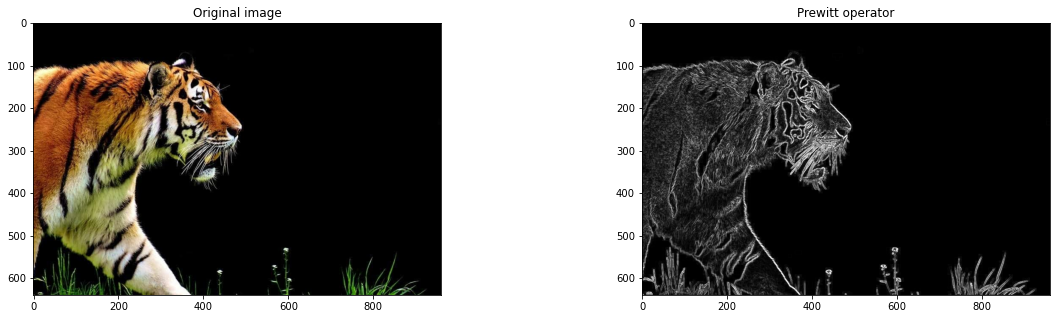

In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# fetch image
img = cv.imread('tiger.jpg', cv.COLOR_BGR2GRAY)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Grayscale image processing
grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Prewitt operator
kernelx = np.array([[1,1,1], [0,0,0], [- 1,- 1,- 1]],dtype=int)
kernely = np.array([[- 1,0,1], [- 1,0,1], [- 1,0,1]],dtype=int)

x = cv.filter2D(grayImage, cv.CV_16S, kernelx)
y = cv.filter2D(grayImage, cv.CV_16S, kernely)

# turn to uint8, image fusion
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)
Prewitt = cv.addWeighted(absX, 0.5, absY, 0.5,0)

# used to display Chinese labels normally
# plt.rcParams['font.sans-serif'] = ['SimHei']

# Display graphics
plt.figure(figsize=(20,5))
titles = ['Original image','Prewitt operator']
images = [rgb_img, Prewitt]

for i in range(2):
    plt.subplot(1,2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
#     plt.xticks([]), plt.yticks([])
plt.show()

# Roberts Operator

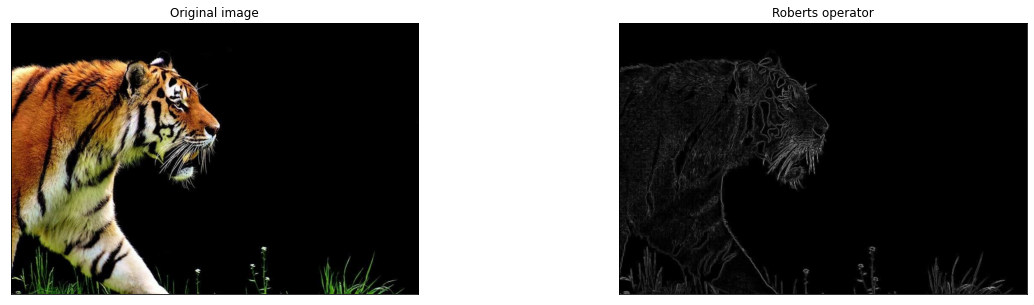

In [41]:
# fetch image
img = cv.imread('tiger.jpg', cv.COLOR_BGR2GRAY)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Grayscale image processing
grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Roberts operator
kernelx = np.array([[- 1,0], [0,1]], dtype=int)
kernely = np.array([[0,- 1], [1,0]], dtype=int)

x = cv.filter2D(grayImage, cv.CV_16S, kernelx)
y = cv.filter2D(grayImage, cv.CV_16S, kernely)

# turn to uint8, image fusion
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)
Roberts = cv.addWeighted(absX, 0.5, absY, 0.5,0)

# Display graphics
plt.figure(figsize=(20,5))
titles = ['Original image','Roberts operator']
images = [rgb_img, Roberts]

for i in range(2):
    plt.subplot(1,2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


# Roberts Edge Detection Error Output still compare

In [43]:
import cv2
import numpy as np
from scipy import ndimage

# Display Images
img1 = cv2.imread("tiger.jpg")
cv2.imshow("Original Image", img1)
k = cv2.waitKey(0)

roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )

img = cv2.imread("tiger.jpg",0).astype('float64')

img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img *=255

cv2.imshow("Roberts Edge Detection",edged_img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()


# Laplacian Edge Detection

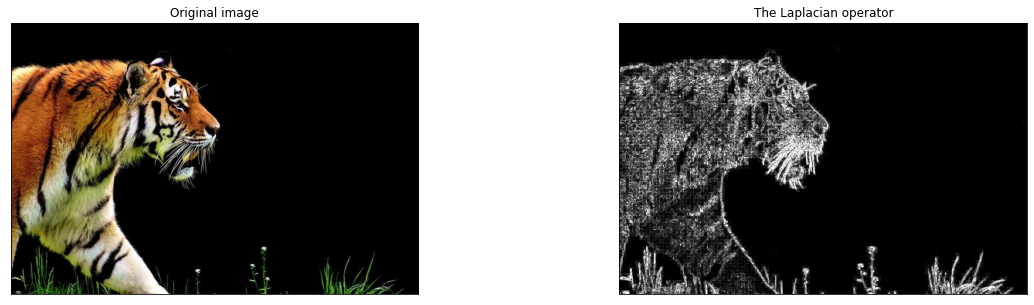

In [19]:
import cv2 as cv
import matplotlib.pyplot as plt

# fetch image
img = cv.imread('tiger.jpg', cv.COLOR_BGR2GRAY)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Grayscale image processing
grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Laplacian
dst = cv.Laplacian(grayImage, cv.CV_16S, ksize = 3)
Laplacian = cv.convertScaleAbs(dst)

# used to display Chinese labels normally
# plt.rcParams['font.sans-serif'] = ['SimHei']

# Display graphics
plt.figure(figsize=(20,5))
titles = ['Original image','The Laplacian operator']
images = [rgb_img, Laplacian]

for i in range(2):
    plt.subplot(1,2, i + 1)
    plt.imshow(images[i], cmap ='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

# Last All at once

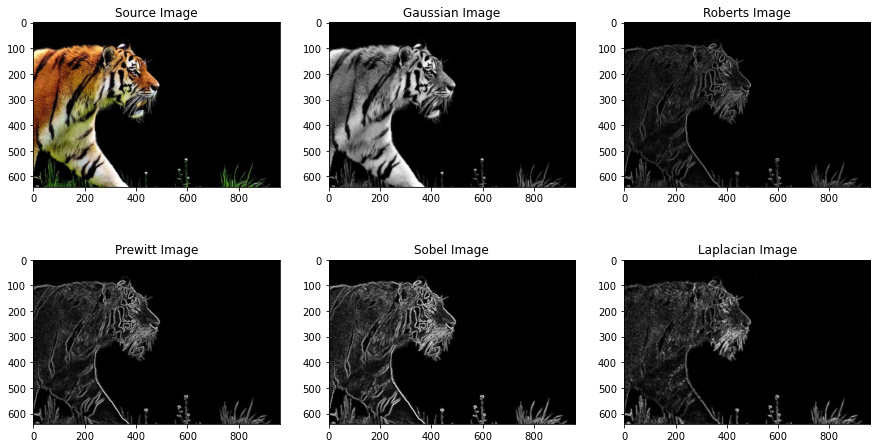

In [35]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# fetch image
img = cv.imread('tiger.jpg')
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Grayscale image processing
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Gaussian filtering
gaussian_blur = cv.GaussianBlur(gray_image, (3,3), 0)

# Roberts operator
kernelx = np.array([[- 1,0], [0,1]], dtype = int)
kernely = np.array([[0,- 1], [1,0]], dtype = int)
x = cv.filter2D(gaussian_blur, cv.CV_16S, kernelx)
y = cv.filter2D(gaussian_blur, cv.CV_16S, kernely)
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)
Roberts = cv.addWeighted(absX, 0.5, absY, 0.5,0)

# Prewitt operator
kernelx = np.array([[1,1,1], [0,0,0], [- 1,- 1,- 1]], dtype=int)
kernely = np.array([[- 1,0,1], [- 1,0,1], [- 1,0,1]], dtype=int)
x = cv.filter2D(gaussian_blur, cv.CV_16S, kernelx)
y = cv.filter2D(gaussian_blur, cv.CV_16S, kernely)
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)
Prewitt = cv.addWeighted(absX, 0.5, absY, 0.5,0)

# Sobel operator
x = cv.Sobel(gaussian_blur, cv.CV_16S, 1,0)
y = cv.Sobel(gaussian_blur, cv.CV_16S, 0,1)
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)
Sobel = cv.addWeighted(absX, 0.5, absY, 0.5,0)

# Laplace algorithm
dst = cv.Laplacian(gaussian_blur, cv.CV_16S, ksize = 3)
Laplacian = cv.convertScaleAbs(dst)

# Show images
plt.figure(figsize=(15,8))
titles = ['Source Image','Gaussian Image','Roberts Image','Prewitt Image','Sobel Image','Laplacian Image']
images = [rgb_img, gaussian_blur, Roberts, Prewitt, Sobel, Laplacian]
for i in np.arange(6):
    plt.subplot(2,3, i+1)
    plt.imshow(images[i], cmap= 'gray')
    plt.title(titles[i])
#     plt.xticks([]), plt.yticks([])
plt.show()